# 1.

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances


In [ ]:
#Cargar y verificar integridad de los datos. Realizar curación si corresponde.
data = pd.read_csv('Pokemon.csv')
data.head()


In [ ]:
#some values in type 2 are missing, so we will fill them with the value 'None'
data['Type 2'].fillna('None', inplace=True)

# 2.

In [ ]:
#Graficar matriz de correlación y realizar un scatter_matrix con plotly.

fig = px.scatter_matrix(data, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Legendary')
fig.show()


In [ ]:
#total vs legendary, boxplot
fig = px.box(data, x='Legendary', y='Total')
fig.show()


In [ ]:
#total of only legendaries vs generation, scatter plot
fig = px.scatter(data, x='Generation', y='Total', color='Legendary')
#average line for total
data_common = data[data['Legendary'] == False]
fig.add_scatter(x=np.arange(1, 7), y=[data_common[data_common['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total')
data_legendary = data[data['Legendary'] == True]
fig.add_scatter(x=np.arange(1, 7), y=[data_legendary[data_legendary['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total Legendary')

fig.show()



In [ ]:
#ignore name, type 1, type 2, generation, legendary, and total
data_new = data.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

# K-MEAN

In [10]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data_new = scaler.fit_transform(data_new)
n_types = data['Type 1'].nunique()


In [ ]:

kmeans = KMeans(n_clusters=n_types, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_new)

In [ ]:
n_types

In [ ]:
#scatter plot total vs type 1, color by cluster
fig = px.scatter(data, x='Generation', y='Total', color='Cluster')
fig.show()


In [3]:
data = pd.read_csv('Pokemon.csv')
data = data[data['Legendary'] == False]
data_new = data.drop(['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_new)

distances_list = []

for j in range(2, 30):
    kmeans = KMeans(n_clusters=j, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data['Cluster'] == i]
        cluster_center = kmeans.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)

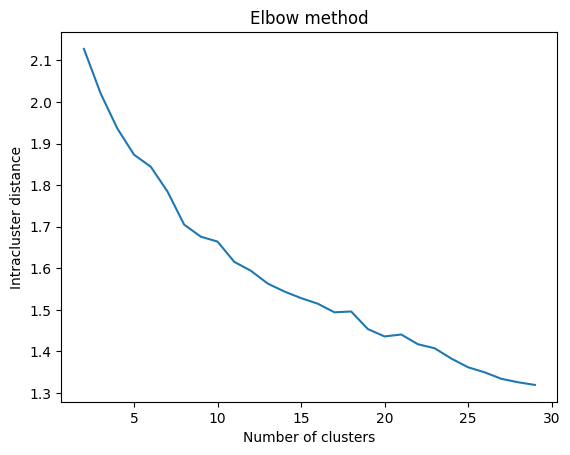

In [4]:
#plot elbow method
plt.plot(np.arange(2,30), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()


In [5]:
# Set the number of clusters to 10
k = 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [9]:
#plot total vs type 1, color by cluster
fig = px.scatter(data, x='Attack', y='Defense', color='Cluster')
fig.show()


# K-MEDIOD

In [13]:
#k-medians clustering
from sklearn_extra.cluster import KMedoids


In [14]:
#elbow method

distances_list = []

for j in range(2, 30):
    kmedians = KMedoids(n_clusters=j, random_state=42)
    data['Cluster'] = kmedians.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data['Cluster'] == i]
        cluster_center = kmedians.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))**2
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)

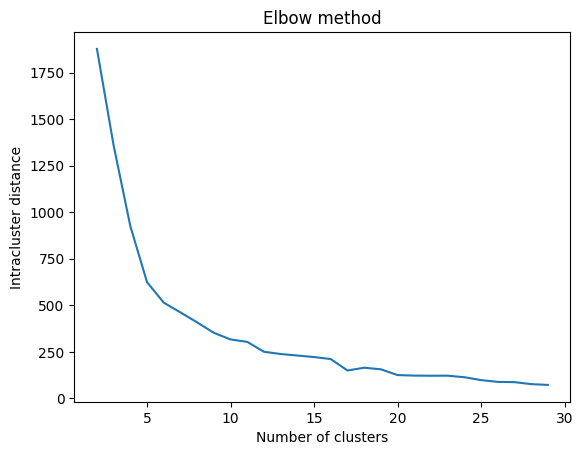

In [15]:
#plot elbow method
plt.plot(np.arange(2,30), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()
